In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
##print(url)

In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | kapaa
Processing Record 4 of Set 13 | mataura
Processing Record 5 of Set 13 | dalvik
Processing Record 6 of Set 13 | klaksvik
Processing Record 7 of Set 13 | mar del plata
Processing Record 8 of Set 13 | arraial do cabo
Processing Record 9 of Set 13 | nemuro
Processing Record 10 of Set 13 | mecca
Processing Record 11 of Set 13 | puerto ayora
Processing Record 12 of Set 13 | touros
Processing Record 13 of Set 13 | santa cruz del sur
Processing Record 14 of Set 13 | amel
Processing Record 15 of Set 13 | narsaq
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | balabac
Processing Record 18 of Set 13 | bredasdorp
Processing Record 19 of Set 13 | haines junction
Processing Record 20 of Set 13 | cidreira
Processing Record 21 of Set 13 | nanortalik
Processing Record 22 of Set 13 | tarko-sale
Processing Record 23 of Set 13 |

Processing Record 37 of Set 16 | portland
Processing Record 38 of Set 16 | kerema
Processing Record 39 of Set 16 | penzance
Processing Record 40 of Set 16 | mlowo
Processing Record 41 of Set 16 | umtata
Processing Record 42 of Set 16 | mount isa
Processing Record 43 of Set 16 | belinskiy
Processing Record 44 of Set 16 | basco
Processing Record 45 of Set 16 | pacific grove
Processing Record 46 of Set 16 | saquarema
Processing Record 47 of Set 16 | vakhrushevo
Processing Record 48 of Set 16 | manokwari
Processing Record 49 of Set 16 | cabedelo
Processing Record 50 of Set 16 | kars
Processing Record 1 of Set 17 | san jose
Processing Record 2 of Set 17 | bambous virieux
Processing Record 3 of Set 17 | ambagarh chauki
Processing Record 4 of Set 17 | buala
Processing Record 5 of Set 17 | thinadhoo
Processing Record 6 of Set 17 | comodoro rivadavia
Processing Record 7 of Set 17 | diapaga
Processing Record 8 of Set 17 | asau
Processing Record 9 of Set 17 | aktau
Processing Record 10 of Set 17 

Processing Record 19 of Set 20 | sumbe
Processing Record 20 of Set 20 | sistranda
Processing Record 21 of Set 20 | aykhal
Processing Record 22 of Set 20 | polunochnoye
Processing Record 23 of Set 20 | mirnyy
Processing Record 24 of Set 20 | pimentel
Processing Record 25 of Set 20 | amderma
City not found. Skipping...
Processing Record 26 of Set 20 | xining
Processing Record 27 of Set 20 | saleaula
City not found. Skipping...
Processing Record 28 of Set 20 | kaeo
Processing Record 29 of Set 20 | carahue
Processing Record 30 of Set 20 | beian
Processing Record 31 of Set 20 | aflu
City not found. Skipping...
Processing Record 32 of Set 20 | ilebo
Processing Record 33 of Set 20 | maldonado
Processing Record 34 of Set 20 | takoradi
Processing Record 35 of Set 20 | neiafu
Processing Record 36 of Set 20 | pisco
Processing Record 37 of Set 20 | tarauaca
Processing Record 38 of Set 20 | khonsa
Processing Record 39 of Set 20 | wellington
Processing Record 40 of Set 20 | zabki
Processing Record 4

Processing Record 5 of Set 24 | acari
Processing Record 6 of Set 24 | tipuani
Processing Record 7 of Set 24 | oshnaviyeh
Processing Record 8 of Set 24 | tromso
Processing Record 9 of Set 24 | kharan
Processing Record 10 of Set 24 | miraflores
Processing Record 11 of Set 24 | limbang
Processing Record 12 of Set 24 | muros
Processing Record 13 of Set 24 | bambanglipuro
Processing Record 14 of Set 24 | labuhan
Processing Record 15 of Set 24 | port keats
Processing Record 16 of Set 24 | nouakchott
Processing Record 17 of Set 24 | oltu
Processing Record 18 of Set 24 | dingle
Processing Record 19 of Set 24 | mandalgovi
Processing Record 20 of Set 24 | treinta y tres
Processing Record 21 of Set 24 | luwuk
Processing Record 22 of Set 24 | valleyview
Processing Record 23 of Set 24 | teguldet
Processing Record 24 of Set 24 | yokadouma
Processing Record 25 of Set 24 | erenhot
Processing Record 26 of Set 24 | okato
Processing Record 27 of Set 24 | esterhazy
Processing Record 28 of Set 24 | noumea


In [12]:
len(city_data)

557

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,52.05,85,53,11.59,AU,2021-11-07 18:14:58
1,Kapaa,22.0752,-159.3190,77.32,80,40,1.99,US,2021-11-07 18:12:09
2,Mataura,-46.1927,168.8643,47.48,97,38,1.95,NZ,2021-11-07 18:14:59
3,Dalvik,65.9702,-18.5286,31.93,91,100,4.09,IS,2021-11-07 18:14:59
4,Klaksvik,62.2266,-6.5890,41.92,67,99,5.66,FO,2021-11-07 18:15:00
5,Mar Del Plata,-38.0023,-57.5575,62.62,82,75,18.99,AR,2021-11-07 18:14:53
6,Arraial Do Cabo,-22.9661,-42.0278,75.06,64,0,13.80,BR,2021-11-07 18:15:00
7,Nemuro,43.3236,145.5750,44.13,69,68,7.25,JP,2021-11-07 18:14:17
8,Mecca,21.4267,39.8261,80.46,54,0,2.64,SA,2021-11-07 18:15:01
9,Puerto Ayora,-0.7393,-90.3518,73.36,72,67,11.25,EC,2021-11-07 18:15:01


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

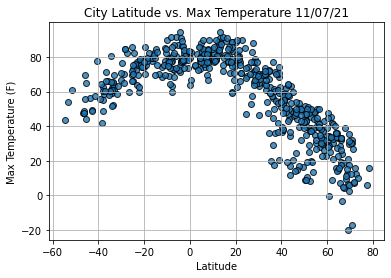

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

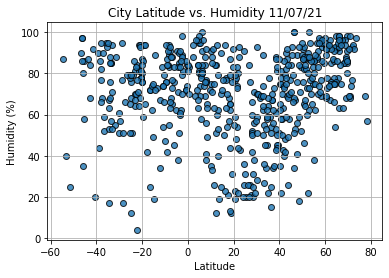

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

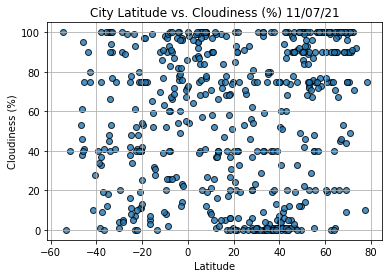

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

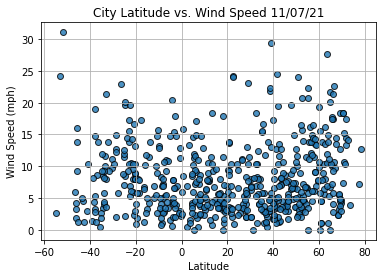

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()